In [1]:
import numpy as np

In [2]:
import numpy as np
base = '/home2/ebrahim/beyond-brainscore/'
from matplotlib import pyplot as plt
import os
from sklearn.metrics import mean_squared_error
import sys
sys.path.append('/home2/ebrahim/beyond-brainscore/')
from plotting_functions import plot_across_subjects, plot_test_perf_across_layers, save_fMRI_simple, pass_info_plot_hist2d, find_rows_without_nan
from trained_results_funcs import create_pd_selected_models, find_best, max_across_selected_models
from trained_untrained_results_funcs import max_across_nested
from scipy.stats import pearsonr
import seaborn as sns
import pandas as pd
import matplotlib
from scipy.stats import ttest_rel, ttest_1samp
import nibabel as nib
from nilearn import plotting
from nilearn import surface
from nilearn import datasets
import plotly
import brainio

In [59]:
def find_best_layer(layer_range, noL2_str, exp, resultsPath, subjects, dataset, perf='pearson_r', 
                    lang_indices = None):
    

    layer_perf_dict = {}
    
    if dataset == 'pereira':
        subjects = subjects[lang_indices]
    
    for l in layer_range:
    
        layer_perf =  np.load(f'{resultsPath}/{dataset}_gpt2-xl_layer_{l}_1{noL2_str}{exp}.npz')[perf]
        
        if perf != 'pearson_r':
            layer_perf = np.clip(layer_perf, 0, np.inf)
        
        layer_perf = np.nan_to_num(layer_perf, nan=0)
        
        if dataset == 'pereira':
            layer_perf = layer_perf[lang_indices]
            
            
        layer_subject = pd.DataFrame({'perf': layer_perf, 'subject': subjects})    
    
        if perf == 'pearson_r':
            perf_avg = np.median(layer_subject.groupby(['subject']).median())
        else:
            perf_avg = np.mean(layer_subject.groupby(['subject']).mean())
        
        layer_perf_dict[l] = perf_avg
            
    best_layer = max(layer_perf_dict, key=layer_perf_dict.get)
    
    layer_perf_best =  np.load(f'{resultsPath}/{dataset}_gpt2-xl_layer_{best_layer}_1{noL2_str}{exp}.npz')[perf]
    layer_perf_best = np.nan_to_num(layer_perf_best, 0)
        
    return layer_perf_dict, best_layer, layer_perf_best    

In [8]:
np.load('/data/LLMs/brainscore/results_pereira/pereira_gpt2-xl-mp_layer_0_1_243.npz')['y_hat'].shape

(243, 60100)

In [62]:
noL2_arr = [True]
shuffled_arr = [False]
dataset_arr = ['pereira']
perf_arr = ['pearson_r']

for perf in perf_arr:
    for noL2 in noL2_arr:
        for shuffled in shuffled_arr:
            for dataset in dataset_arr:
                
                if noL2:
                    noL2_str = '_noL2'
                else:
                    noL2_str = ''
                    
                if shuffled:
                    shuffled_str = '_shuffled'
                else:
                    shuffled_str = ''

                
                resultsPath_dataset_nonshuffled = f'/data/LLMs/brainscore/results_{dataset}'
                if shuffled:
                    resultsPath_dataset = f'/data/LLMs/brainscore/results_{dataset}/shuffled'
                else:
                    resultsPath_dataset = resultsPath_dataset_nonshuffled
                data_processed_folder = f'/data/LLMs/data_processed/{dataset}/dataset'
                figurePath = '/home2/ebrahim/beyond-brainscore/analyze_results/figures_code/figures/new_figures/figure1/'
                figurePath = f'{figurePath}{perf}/'
                default_palette = sns.color_palette('deep')   

        
                # load information regarding number of voxels, subjects, and functional network localization for each experiment into a dictionary
                if dataset ==  'pereira':

                    exp = ['243']

                    br_labels_dict = {}
                    num_vox_dict = {}
                    subjects_dict = {}
                    for e in exp:

                        bre = np.load(f'{data_processed_folder}/networks_{e}.npy', allow_pickle=True)
                        br_labels_dict[e] = bre
                        num_vox_dict[e] = bre.shape[0]
                        subjects_dict[e] = np.load(f"{data_processed_folder}/subjects_{e}.npy", allow_pickle=True)
                        
                    lang_indices_243 = np.argwhere(br_labels_dict['243'] == 'language').squeeze()
                    
                else:
                    subjects_arr  = np.load(f"{data_processed_folder}/subjects.npy", allow_pickle=True)
                    

                gpt2_xl_243_dict, gpt2_xl_243_bl, gpt2_xl_243_bl_perf = find_best_layer(np.arange(0,49), noL2_str=noL2_str, exp='_243', 
                                                                resultsPath=resultsPath_dataset, lang_indices=lang_indices_243, dataset=dataset, 
                                                                subjects=subjects_dict['243'], perf=perf)


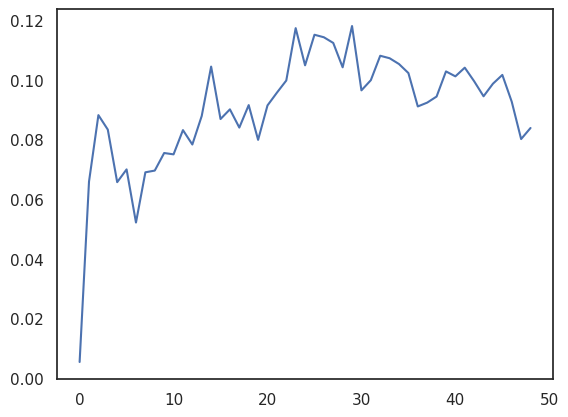

In [61]:
plt.plot(gpt2_xl_243_dict.values())

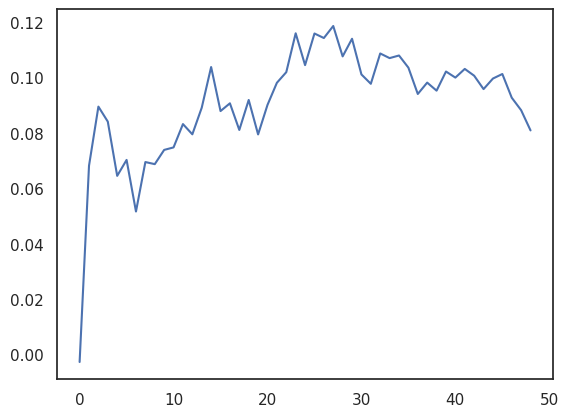

In [63]:
plt.plot(gpt2_xl_243_dict.values())